Intro: Having done data cleaning, data wrangling, EDA, and data processing on our dataframe, is it now time to use the data to create a predictive machine learning model. I will experiment with 3 models and see which is the best fit for our data by finding the lowest MSE while preventing overfitting.

Import the necessary libraries.

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np





Import the csv and turnit into a database.

In [4]:
df = pd.read_csv('df_final', index_col = False)


Review the database.

In [6]:
df.head()

,GameID,Global Sales,Price (USD),Metacritic Score,Player Score,NA Sales,Game_F.E.A.R.,Game_Portal 2,Game_The Evil Within,Game_Tomb Raider: Legend,...,Developer_Haemimont,Developer_Io Interactive,Developer_MachineGames,Developer_Obsidian Entertainment,Developer_Rebellion,Developer_Tango Gameworks,Developer_Techland,Developer_Valve Software,Developer_Volition Inc.,Developer_Yuke's
0,12140,3.31,-0.909379,1.175885,0.984675,3.028921,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12140,1.22,-0.909379,1.175885,0.834958,1.165682,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12140,0.03,-0.909379,1.175885,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,748490,0.19,2.429418,0.491903,0.086375,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,748490,0.15,2.429418,0.491903,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Scale the dependent variable, 'Global Sales', so thats its consistent with the scaled indepedent variables.

In [8]:
scaler = StandardScaler()

df['Global Sales'] = scaler.fit_transform(df[['Global Sales']])


Review the newly scaled 'Global Sales' column.

In [9]:
df['Global Sales'].describe()

count    4.420000e+02
mean     1.125294e-16
std      1.001133e+00
min     -7.330029e-01
25%     -6.126104e-01
50%     -3.937148e-01
75%      1.535240e-01
max      4.651827e+00
Name: Global Sales, dtype: float64

In [10]:
df.head()

,GameID,Global Sales,Price (USD),Metacritic Score,Player Score,NA Sales,Game_F.E.A.R.,Game_Portal 2,Game_The Evil Within,Game_Tomb Raider: Legend,...,Developer_Haemimont,Developer_Io Interactive,Developer_MachineGames,Developer_Obsidian Entertainment,Developer_Rebellion,Developer_Tango Gameworks,Developer_Techland,Developer_Valve Software,Developer_Volition Inc.,Developer_Yuke's
0,12140,2.878773,-0.909379,1.175885,0.984675,3.028921,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12140,0.591315,-0.909379,1.175885,0.834958,1.165682,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12140,-0.711113,-0.909379,1.175885,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,748490,-0.535997,2.429418,0.491903,0.086375,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,748490,-0.579776,2.429418,0.491903,0.460666,-0.605317,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Split the data in order to do linear regression testing to see if the relationship between the dependent and independent variables are linear.

In [12]:
X= df.drop(columns = ['GameID', 'Global Sales'])
y = df['Global Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

The accuracy of the test will be determined by its mean squared error (MSE).

In [17]:
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_mse

1.7153947521716861e+22

The MSE is very high, largely due to the dataset having to many features in order to get an accurate prediction using linear regression.

I will try cross validation on the linear regression test in order to see if that can improve the MSE.

In [19]:
model = LinearRegression()

In [20]:
cv_scores = cross_val_score(model, X, y, cv= 5, scoring='neg_mean_squared_error')

In [21]:
mse = -cv_scores.mean()
mse

8.36717563225164e+22

Doing cross validation on the linear regression test increased the MSE, indicating the lower MSE from previous the test may have been contributed to overfitting on a specific subset of data.

I will try the random forest model due to its abillity to handle a larger number of features as compared to a linear regression model.

In [23]:
X = df.drop(columns = ['GameID', 'Global Sales'])
y = df['Global Sales']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

Tried 50, 150, 200, 300 and found that 100 n_estimators to be the most optimal.

In [26]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [27]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
model_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, model_pred)
mse

0.05851468050320904

The MSE has been greatly reduced using the random forest model. Next, I use the grid search function to find the optimal hyperparameters and use cross validation to reduce variance and prevent overfitting.

I will setup the parameter grid with a variety of hyperparameters.

In [35]:
param_grid  = {'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10, 20]}

In [36]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [37]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error', n_jobs = -1)

In [38]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [39]:
print(grid_search.best_params_)
print(-grid_search.best_score_)

{'max_depth': 10, 'min_samples_split': 5}
0.09726145070372894


The model found the optimal hyperparameters to be a max depth of 10 with a minimum sample size of 5, leading to a MSE of .0972. This is an increase from the previous MSE, indicating that overfitting may have occured in the previous random forest model.

Next, I will try the gradient boosting regressor model for its ability to handle a large amount of features as well as its ability to reduce overfitting with its shallower estimators, compared to those of a random forest model. 

In [41]:
model = GradientBoostingRegressor(n_estimators= 100, learning_rate = .1, max_depth = 3, random_state = 42)

In [42]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05167063571072885

The MSE using the gradient boosting regressor model is the lowest so far, at .0516. However, similar to the random forest model, I'm going to use the grid search function to find the optimal hyperparameters and do cross validation to reduce variance and prevent overfitting.

I will set up the parameter grid with a variety of hyperparameters.

In [47]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10]  
    }


In [49]:
model = GradientBoostingRegressor(random_state = 42)

In [51]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring  = 'neg_mean_squared_error', n_jobs = -1)

In [53]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [55]:
print(grid_search.best_params_)
print(-grid_search.best_score_)

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 300}
0.08982556396073303


The model found the optimal hyperparameters to be a max depth of 4, a minimum sample size of 10, with 300 n_estimators, leading to a MSE of .0898. This is an increase from the previous MSE, indicating that overfitting may have occured in the previous gradient boosting regressor model. However, after testing with several models, optimizing their hyperparameters, and testing on several subsets of the data using cross validation to reduce overfitting, this model comes out as the best fit for out data.

Next, I will visualize our results by plotting the our predicted results with our actual results.

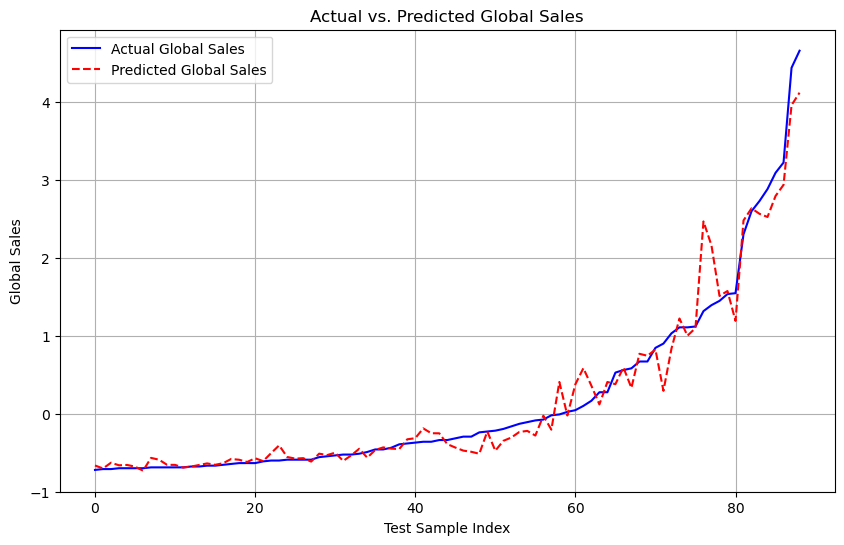

In [112]:
y_test_np = np.array(y_test)
sorted_indices = y_test_np.argsort()
y_test_sorted = y_test_np[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Global Sales', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label='Predicted Global Sales', linestyle='--', color='red')
plt.xlabel('Test Sample Index')
plt.ylabel('Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.legend()
plt.grid(True)
plt.show()

The graph illustrates the strong correlation between our selected models global sales predictions versus the actual global sales. 

Conclusion: The gradient boosting regressor with the grid search function ended up being the best model because it fine-tuned the settings to avoid overfitting, making it more reliable and consistent. Even though its MSE wasn't the lowest, the grid search function helped the model perform well across different parts of the data by testing different parameter combinations. This means the model is likely to handle new, unseen data better, rather than just fitting perfectly to one specific set. The lower MSE from the version without the grid search might be due to overfitting, which isn't as useful for real-world predictions.






